<a href="https://colab.research.google.com/github/raflinoob132/MachineLearning-1/blob/main/Week%207/Task%202/Colab%20Notebook/Week_7_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Semua analisis dan evaluasi ada di file PDF

1. Heart Disease menggunakan Boosting

Akurasi: 0.78
Presisi: 0.79
Recall: 0.78
F1-Score: 0.79
AUC-ROC: 0.78

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        46
           1       0.53      0.57      0.55        14

    accuracy                           0.78        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.79      0.78      0.79        60

Confusion Matrix:
[[39  7]
 [ 6  8]]


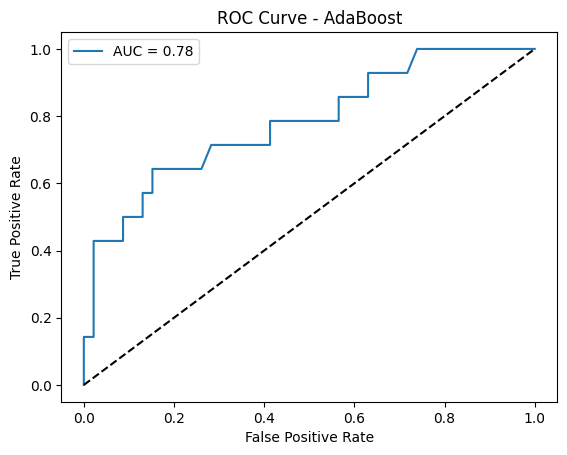

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/HeartDisease.csv"
df = pd.read_csv(url)

# Drop missing values
df = df.dropna()

# Fitur dan target (gunakan exang sebagai target)
X = df.drop('exang', axis=1)
y = df['exang']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Boosting
boost_model = AdaBoostClassifier(n_estimators=50, random_state=42)
boost_model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = boost_model.predict(X_test_scaled)
y_proba = boost_model.predict_proba(X_test_scaled)[:, 1]

# Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test, y_proba)

# Cetak hasil
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoost')
plt.legend()
plt.show()


2. Citarum water menggunakan Bagging

In [11]:
!pip install mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix, classification_report
)
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import label_binarize

import mglearn

# Load dataset
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/refs/heads/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)

# 1. Hapus kolom yang tidak diperlukan
df = df.drop(['No', 'NamaSungai', 'Waktu', 'TitikPantau', 'O2'], axis=1)

# 2. Konversi kolom 'Temp' ke float
df['Temp'] = df['Temp'].str.replace('°C', '', regex=True).astype(float)

# 3. Hapus baris dengan NaN
df = df.dropna()

# 4. Pastikan tidak ada NaN tersisa
print("Jumlah NaN setelah preprocessing:")
print(df.isnull().sum())

# 5. Pisahkan fitur (X) dan target (y)
X = df.drop('Class', axis=1)
y = df['Class']

# 6. Bagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7. Normalisasi data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. Pastikan tidak ada NaN setelah scaling
print("\nJumlah NaN di X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Jumlah NaN di X_test_scaled:", np.isnan(X_test_scaled).sum())

# 9. Buat model Bagging
base_model = LogisticRegression(
    max_iter=5000,
    solver='lbfgs',
    multi_class='multinomial',
    random_state=42
)

bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,
    random_state=42,
    n_jobs=-1
)

# 10. Latih model Bagging
bagging_model.fit(X_train_scaled, y_train)

# 11. Prediksi
y_pred = bagging_model.predict(X_test_scaled)
y_proba = bagging_model.predict_proba(X_test_scaled)

# 12. Ubah label y_test jadi one-hot untuk AUC multiclass
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# 13. Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')

# 14. Tampilkan hasil
print("\n=== Bagging Model ===")
print(f"Akurasi: {accuracy:.2f}")
print(f"Presisi: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC-ROC: {auc:.2f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Jumlah NaN setelah preprocessing:
pH               0
Temp             0
TSS              0
DO               0
BOD              0
COD              0
Nitrat           0
FecalColiform    0
Fosfat           0
IP               0
Class            0
dtype: int64

Jumlah NaN di X_train_scaled: 0
Jumlah NaN di X_test_scaled: 0

=== Bagging Model ===
Akurasi: 0.96
Presisi: 0.96
Recall: 0.96
F1-Score: 0.96
AUC-ROC: 1.00

Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95       196
           2       0.96      0.97      0.96       294
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         4

    accuracy                           0.96       500
   macro avg       0.98      0.94      0.96       500
weighted avg       0.96      0.96      0.96       500

Confusion Matrix:
[[184  12   0   0]
 [  8 286   0   0]
 [  0   1   5   0]
 [  0   0   0   4]]


3. Income menggunakan  boosting


=== Evaluasi Gradient Boosting ===
Accuracy : 0.8687
Precision: 0.7873
Recall   : 0.6231
F1-Score : 0.6956
ROC AUC  : 0.9237


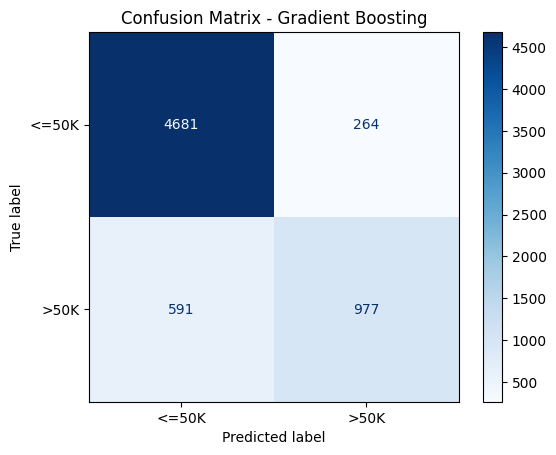

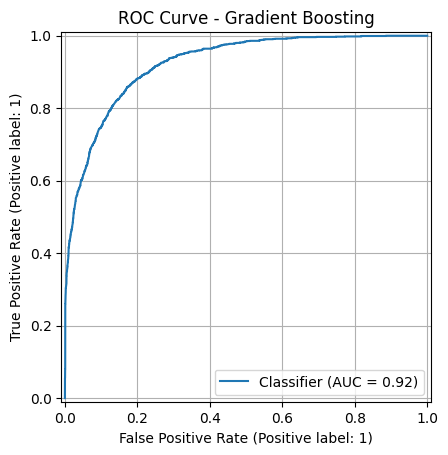

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             ConfusionMatrixDisplay, RocCurveDisplay)

# 1. Load Data
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/02.%20Deep%20Learning/Dataset/income.csv"
data = pd.read_csv(url)

# 2. Handle missing values
data['workclass'] = data['workclass'].fillna('Unknown')
data['occupation'] = data['occupation'].fillna('Unknown')
data['native-country'] = data['native-country'].fillna('Unknown')

# 3. Pisahkan fitur dan target
X = data.drop(['income', 'fnlwgt', 'education'], axis=1)
y = data['income'].str.strip()
y = y[y.isin(['<=50K', '>50K'])]  # pastikan valid
X = X.loc[y.index]

# 4. Encode target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 5. Preprocessing
numeric_features = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numeric_features),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ]), categorical_features)
])

# 6. Boosting Pipeline
boosting_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ))
])

# 7. Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 8. Training
boosting_pipeline.fit(X_train, y_train)

# 9. Evaluasi
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(f"\n=== Evaluasi {model_name} ===")
    print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall   : {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score : {f1_score(y_test, y_pred):.4f}")
    print(f"ROC AUC  : {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title(f'ROC Curve - {model_name}')
    plt.grid(True)
    plt.show()

evaluate_model(boosting_pipeline, X_test, y_test, "Gradient Boosting")
